In [1]:
#importing all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading csv file
df = pd.read_csv('column_2C_weka.csv') #first we use 2 category data then we go for another one

In [3]:
#seeing some samples of total population
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
#checking summary of the whole data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
#finding all the important numeric features of data
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [6]:
#converting all the categorical feature into numeric feature
df['class'] = df['class'].apply(lambda x:1 if x == 'Abnormal' else 0)

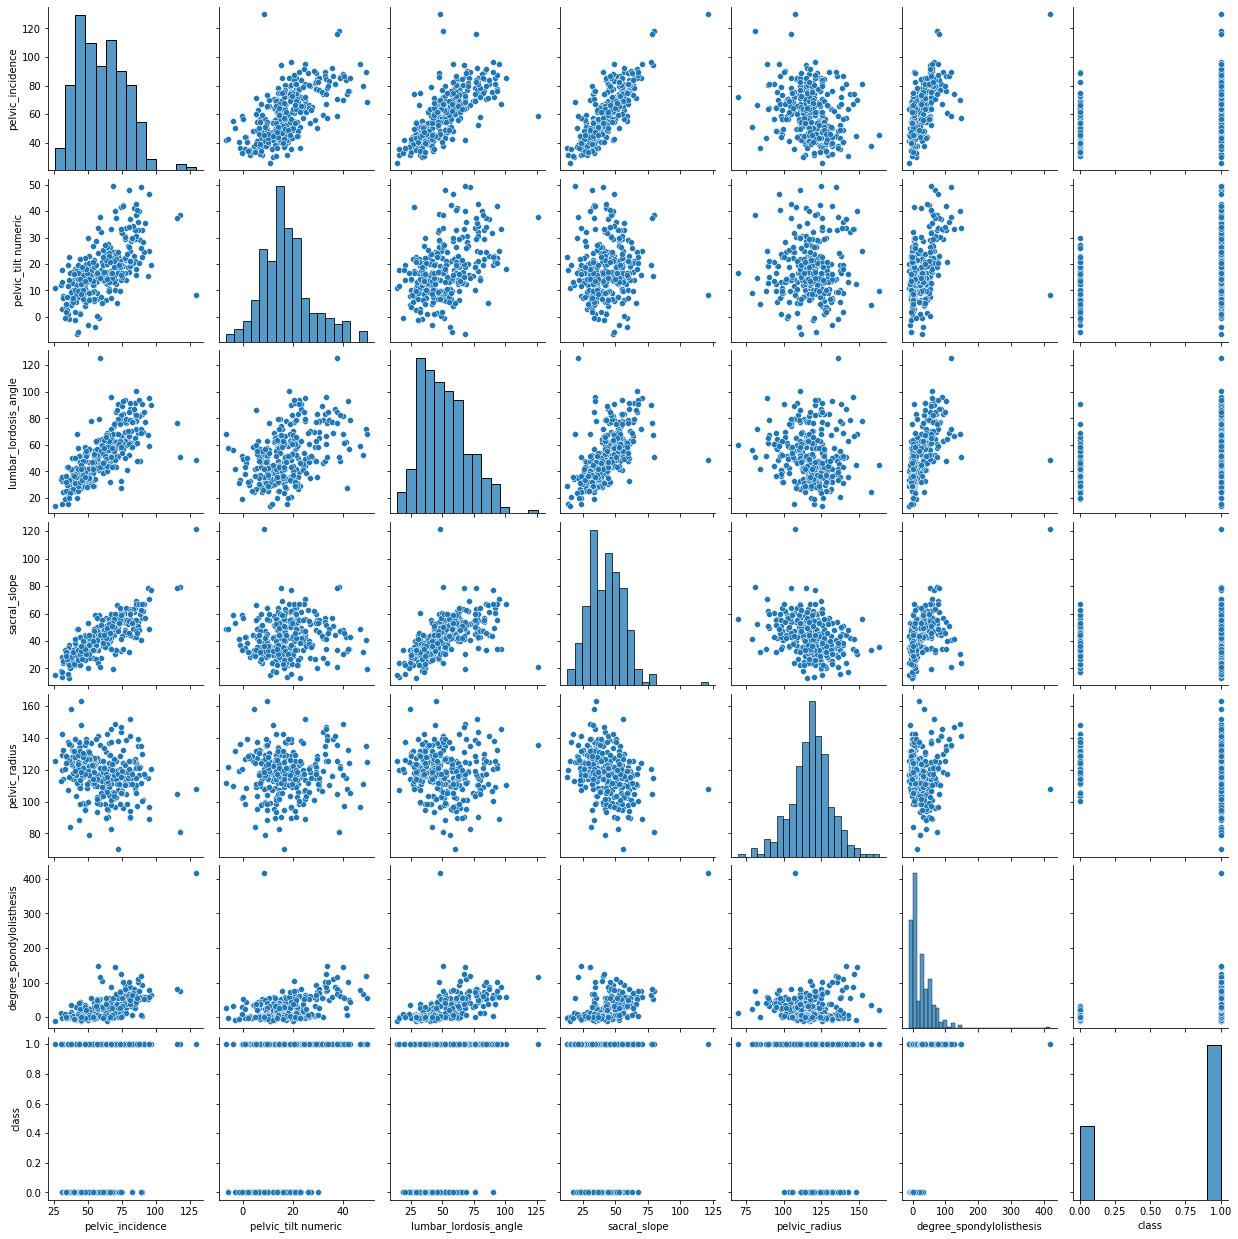

In [7]:
#diagonal shows histogram of each features
sns.pairplot(df)

In [8]:
#first we use data without performing any scaling
x = df.drop(columns = ["class"])
y = df["class"]

In [9]:
#splits the data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [10]:
#applying the knn to train the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

#testing our model
knn.predict(x_test)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [11]:
#checking the accuracy
print(knn.score(x_test, y_test))

0.7864077669902912


In [12]:
#we use standardscalar to scale the data
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(x.values)
scaled_x = pd.DataFrame(scaled_features, index=df.index, columns=x.columns)

In [13]:
#we will use scaled data to check if it makes any difference in the prediction
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(scaled_x,y, test_size=0.33, random_state=101)

In [14]:
#we take one train one more model on scaled data
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(x_train_scaled, y_train)

knn1.predict(x_test_scaled)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [15]:
#there is no change accuracy though there is change in prediction
print(knn1.score(x_test_scaled, y_test))

0.7864077669902912


In [16]:
# not making any difference on scaling the features as features were of similar range

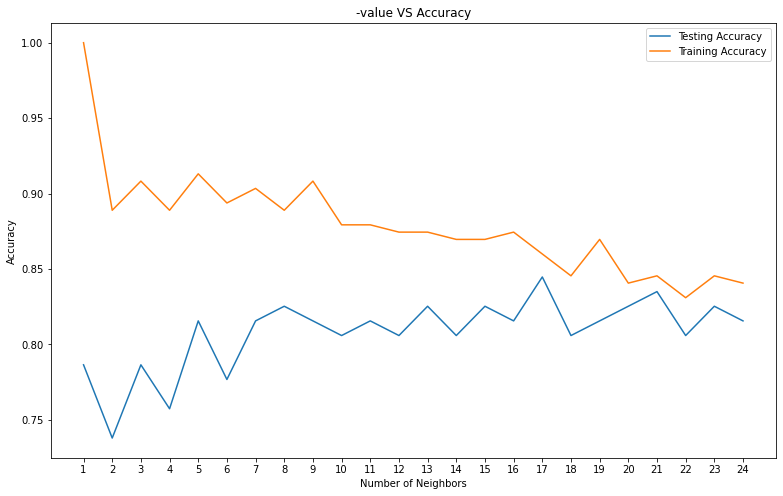

Best accuracy is 0.8446601941747572 with K = 17


In [17]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [18]:
#trying same data taking 3 target variable instead of 2
df1 = pd.read_csv('column_3C_weka.csv')

In [19]:
df1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [21]:
df1.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [22]:
#here we have three category so we will use 
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df1[['class']] = enc.fit_transform(df1[['class']])

In [23]:
#first we use data without performing any scaling
x1 = df1.drop(columns = ["class"])
y1 = df1["class"]

In [24]:
#splits the data into train and test set
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.33, random_state=101)

In [25]:
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x1_train, y1_train)

#testing our model
knn3.predict(x1_test)

array([1., 0., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 0., 0., 1., 0.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 0., 1., 1., 2.,
       1., 2., 1., 2., 2., 2., 1., 0., 0., 2., 0., 1., 2., 2., 1., 1., 1.,
       1., 2., 2., 1., 2., 2., 2., 2., 0., 2., 2., 2., 2., 1., 2., 2., 0.,
       1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 0., 2., 0., 1.,
       2., 0., 2., 0., 1., 2., 0., 0., 2., 1., 2., 2., 1., 1., 0., 0., 2.,
       2.])

In [26]:
#checking the accuracy
print(knn3.score(x1_test, y1_test))

0.7864077669902912


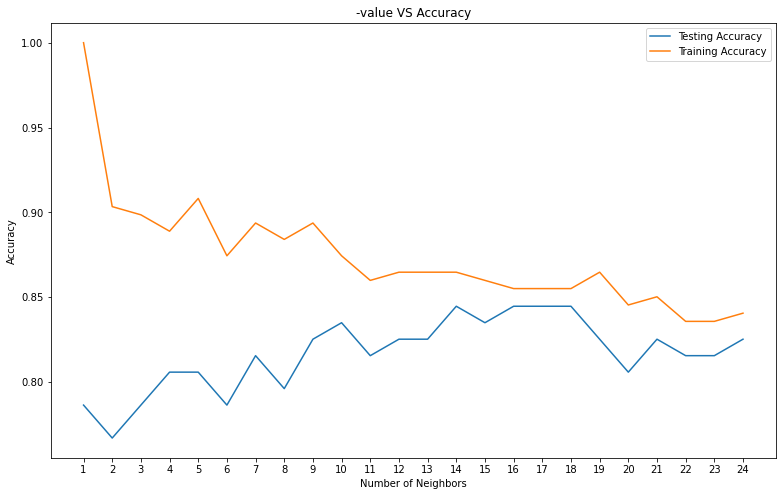

Best accuracy is 0.8446601941747572 with K = 14


In [27]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn3 = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn3.fit(x1_train,y1_train)
    #train accuracy
    train_accuracy.append(knn3.score(x1_train, y1_train))
    # test accuracy
    test_accuracy.append(knn3.score(x1_test, y1_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [28]:
#there is difference in the value of k 
#same data with 3 categories need less k value to get best possible accuracy(both case having same result)

In [29]:
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


<AxesSubplot:xlabel='pelvic_incidence', ylabel='pelvic_tilt numeric'>

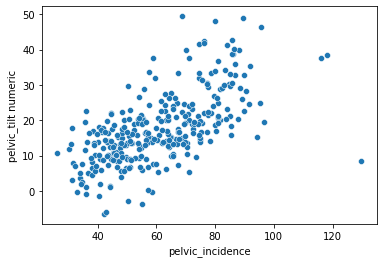

In [30]:
sns.scatterplot(data=df, x="pelvic_incidence", y="pelvic_tilt numeric")

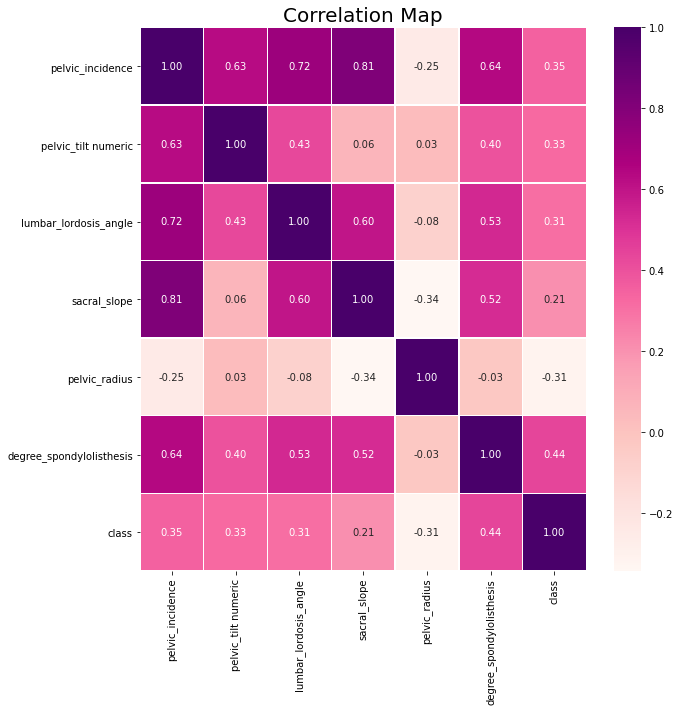

In [31]:
#check all the attribute 
f, ax = plt.subplots(figsize=(10,10)) #set (x-axis-height,y-axis-height)
sns.heatmap(df.corr(), annot=True, linewidth=".5", cmap="RdPu", fmt=".2f", ax = ax)
#linewidth --Width of the lines that will divide each cell
#cmap is used to set color combination
#fmt is used to set the how much fraction value need after point
#ax is fitting the axis that we want(here we set axis in first line of code)
plt.title("Correlation Map",fontsize=20)
plt.show()

In [32]:
# drop sacral_scope feature 

# Reasons
# 1) it is highly correlated with ['pelvic_incidence', 'pelvic_tilt numeric',
#     'lumbar_lordosis_angle'],we have included all three features so we don't need 
#     this feature.
# 2) very less correlation with the target variable so it can be exluded.

In [33]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [43]:
#trying with droping sacral_scope feature
x2 = df.drop(columns = ['class','sacral_slope'])
y2 = df["class"]

In [44]:
#splits the data into train and test set
x2_train,x2_test,y2_train,y2_test = train_test_split(x2, y2, test_size=0.33, random_state=101)

In [45]:
knn4 = KNeighborsClassifier(n_neighbors = 3)
knn4.fit(x2_train, y2_train)

#testing our model
knn4.predict(x2_test)

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [46]:
#checking the accuracy
print(knn4.score(x2_test, y2_test))

0.8349514563106796


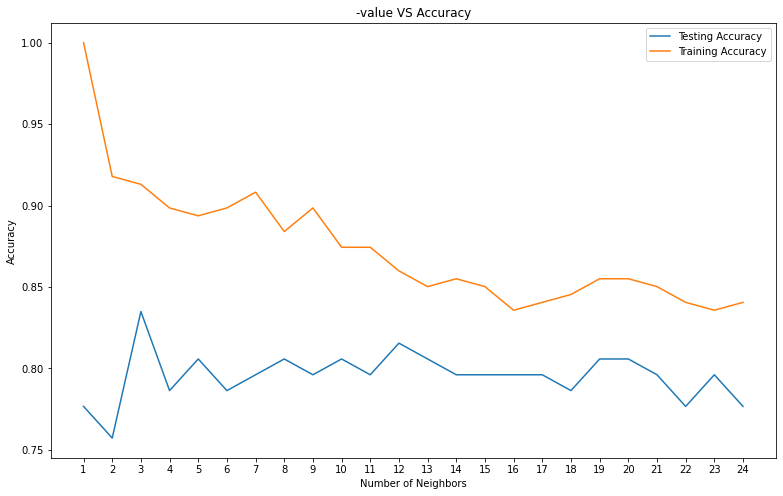

Best accuracy is 0.8349514563106796 with K = 3


In [38]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn4 = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn4.fit(x2_train,y2_train)
    #train accuracy
    train_accuracy.append(knn4.score(x2_train, y2_train))
    # test accuracy
    test_accuracy.append(knn4.score(x2_test, y2_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))